# KMeans

In [12]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

from src.cluster import k_means_elbow_analysis, silhouette_analysis, fit_kmeans

## Read in scaled features

In [13]:
df = pd.read_csv("../data/cohort_features_scaled.csv", index_col="ID")
df.head(5)

,n_stays,admission_age,suspected_infection,weight,height,heart_rate_min,heart_rate_max,temperature_min,temperature_max,mbp_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
ID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.277778,0.0,0.362486,0.671053,0.426357,0.403846,0.818868,0.551402,0.61,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.638889,1.0,0.550055,0.473684,0.558140,0.532051,0.794340,0.598131,0.64,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000000,0.347222,1.0,0.619411,0.763158,0.550388,0.448718,0.825786,0.644860,0.51,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.638889,1.0,0.334787,0.368421,0.302326,0.442308,0.780503,0.634579,0.43,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.166667,0.750000,0.0,0.383860,0.736842,0.271318,0.410256,0.808805,0.551402,0.41,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Drop irrelevant features
df = df.drop(columns=["n_stays"])

## Parameter exploration

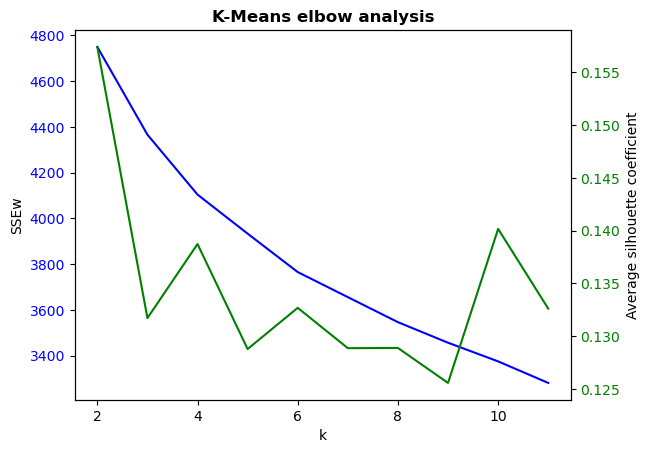

    k        sse_w  silhouette
0   2  4749.864221    0.157414
1   3  4366.301894    0.131715
2   4  4104.312637    0.138732
3   5  3933.605733    0.128783
4   6  3765.683628    0.132687
5   7  3656.107468    0.128863
6   8  3546.693948    0.128884
7   9  3456.827210    0.125571
8  10  3375.225062    0.140169
9  11  3281.105685    0.132613


In [15]:
"""
Use the elbow method to determine the "k", number of clusters
"""
# Determine the range of k values to analyse
k_max = 11
k_list = np.linspace(1, k_max, 11, dtype=int)[1:]

k_means_elbow_analysis(
    k_list, df,
    title=f"K-Means elbow analysis"
)

For k = 4 The average silhouette_score is : 0.13873221580280462
For k = 6 The average silhouette_score is : 0.13268680894696294
For k = 10 The average silhouette_score is : 0.14016850696392316


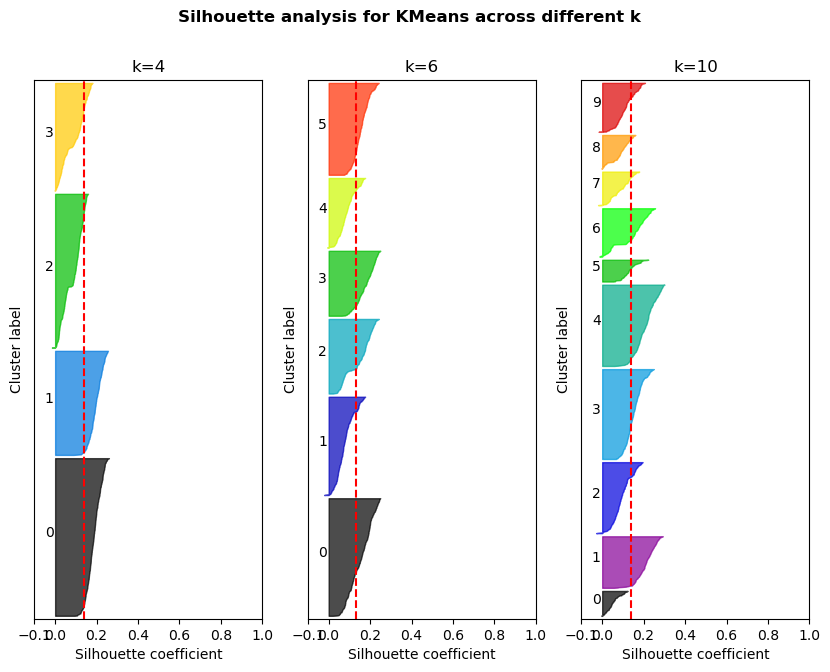

In [16]:
"""
Deep dive selected values of k

Below analysis is adapted from:
https://scikit-learn.org/0.24/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
"""

range_k = [4, 6, 10]

silhouette_analysis(
    range_k, df,
    title=f"Silhouette analysis for KMeans across different k"
)

## Assign the clusters

In [17]:
k = 4
_, kmeans = fit_kmeans(args=(k, df))
assigned_clusters = pd.DataFrame(kmeans.predict(df), columns=["cluster"])
assigned_clusters.index.name = "ID"
assigned_clusters.to_csv(f"../data/cohort_clusters_kmeans_{k}.csv")
assigned_clusters

,cluster
ID,
0,2
1,2
2,0
3,1
4,2
...,...
1768,3
1769,2
1770,0


In [18]:
assigned_clusters.value_counts()

cluster
0          534
2          521
3          365
1          353
dtype: int64

## Generate the COS

In [19]:
# Get the cluster label for COS
cos_label = assigned_clusters.value_counts().index[0]
cos_label

(0,)

In [20]:
# Load the original dataset with the unscaled features
df_original = pd.read_csv("../data/cohort_processed.csv", index_col=0)
df_original.index.name = "ID"

In [21]:
df_cluster = pd.merge(left=df_original, right=assigned_clusters, on="ID")
cos = df_cluster[df_cluster["cluster"] == cos_label].drop(columns=["cluster"])
cos.to_csv("../data/cos_features_kmeans.csv")
cos

,subject_id,hadm_id,stay_id,n_stays,sum_los,admission_age,suspected_infection,weight,height,heart_rate_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
ID,,,,,,,,,,,,,,,,,,,,,
2,10021487,28998349,38197705,1,15.67,43,1.0,143.000000,185.0,99.0,...,0,0,0,1,0,1,0,0,1,0
5,10036086,28728587,38809220,1,18.58,58,1.0,113.000000,173.0,101.0,...,0,0,0,1,0,1,0,0,1,0
7,10048001,28426278,31975834,1,4.63,64,1.0,95.100000,180.0,70.0,...,0,0,0,1,0,0,0,0,1,0
13,10064854,20184139,34896096,1,15.00,83,1.0,71.300000,173.0,102.0,...,0,0,0,1,1,1,0,0,1,0
15,10076526,23108527,34659580,1,8.75,50,1.0,75.250000,175.0,99.0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,19970265,24514478,38356273,1,15.04,20,1.0,67.900000,175.0,89.0,...,0,0,0,1,0,1,0,0,0,1
1765,19970491,22119205,38881623,1,3.71,57,1.0,72.500000,168.0,63.0,...,0,0,0,1,0,1,0,0,1,0
1767,19970491,29133530,35700182,1,3.79,58,1.0,52.566667,165.0,40.0,...,0,0,0,1,0,1,0,0,0,0


In [22]:
cos.describe(include="all")

,subject_id,hadm_id,stay_id,n_stays,sum_los,admission_age,suspected_infection,weight,height,heart_rate_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
count,5.340000e+02,5.340000e+02,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.0,534.0,534.0,534.0,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,1.489863e+07,2.511085e+07,3.478467e+07,1.196629,11.325637,55.900749,0.930712,92.618917,176.216835,74.908240,...,0.0,0.0,0.0,1.0,0.071161,0.928839,0.058052,0.007491,0.846442,0.134831
std,2.932372e+06,2.966158e+06,2.885588e+06,0.527577,8.258090,16.519801,0.254182,24.911671,7.530912,18.916946,...,0.0,0.0,0.0,0.0,0.257335,0.257335,0.234062,0.086305,0.360863,0.341864
min,1.002149e+07,2.000136e+07,3.000756e+07,1.000000,3.380000,19.000000,0.000000,45.800000,152.000000,30.000000,...,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.223240e+07,2.251136e+07,3.213834e+07,1.000000,5.080000,44.000000,1.000000,74.887500,173.000000,61.000000,...,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.490152e+07,2.529893e+07,3.476000e+07,1.000000,8.730000,57.000000,1.000000,88.000000,178.000000,74.000000,...,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.735449e+07,2.777482e+07,3.713952e+07,1.000000,15.110000,68.000000,1.000000,104.850000,180.000000,87.000000,...,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.999082e+07,2.999962e+07,3.997904e+07,7.000000,49.130000,90.000000,1.000000,230.250000,203.000000,128.000000,...,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
